In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
# loading data and exploring data
data = pd.read_csv("Case Study Data.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [7]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,NaN,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37444.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,36040.000000,41188.000000,41188.000000,41188.000000
mean,39.999947,258.285010,2.567593,962.475454,0.172963,0.081886,93.575575,-40.502600,3.621291,5167.035911
std,10.414908,259.279249,2.770014,186.910907,0.494901,1.570960,0.579216,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Correlation Matrix
Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

<AxesSubplot:>

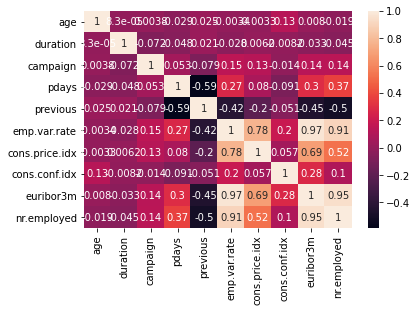

In [9]:
corelation = data.corr()
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns,annot = True)

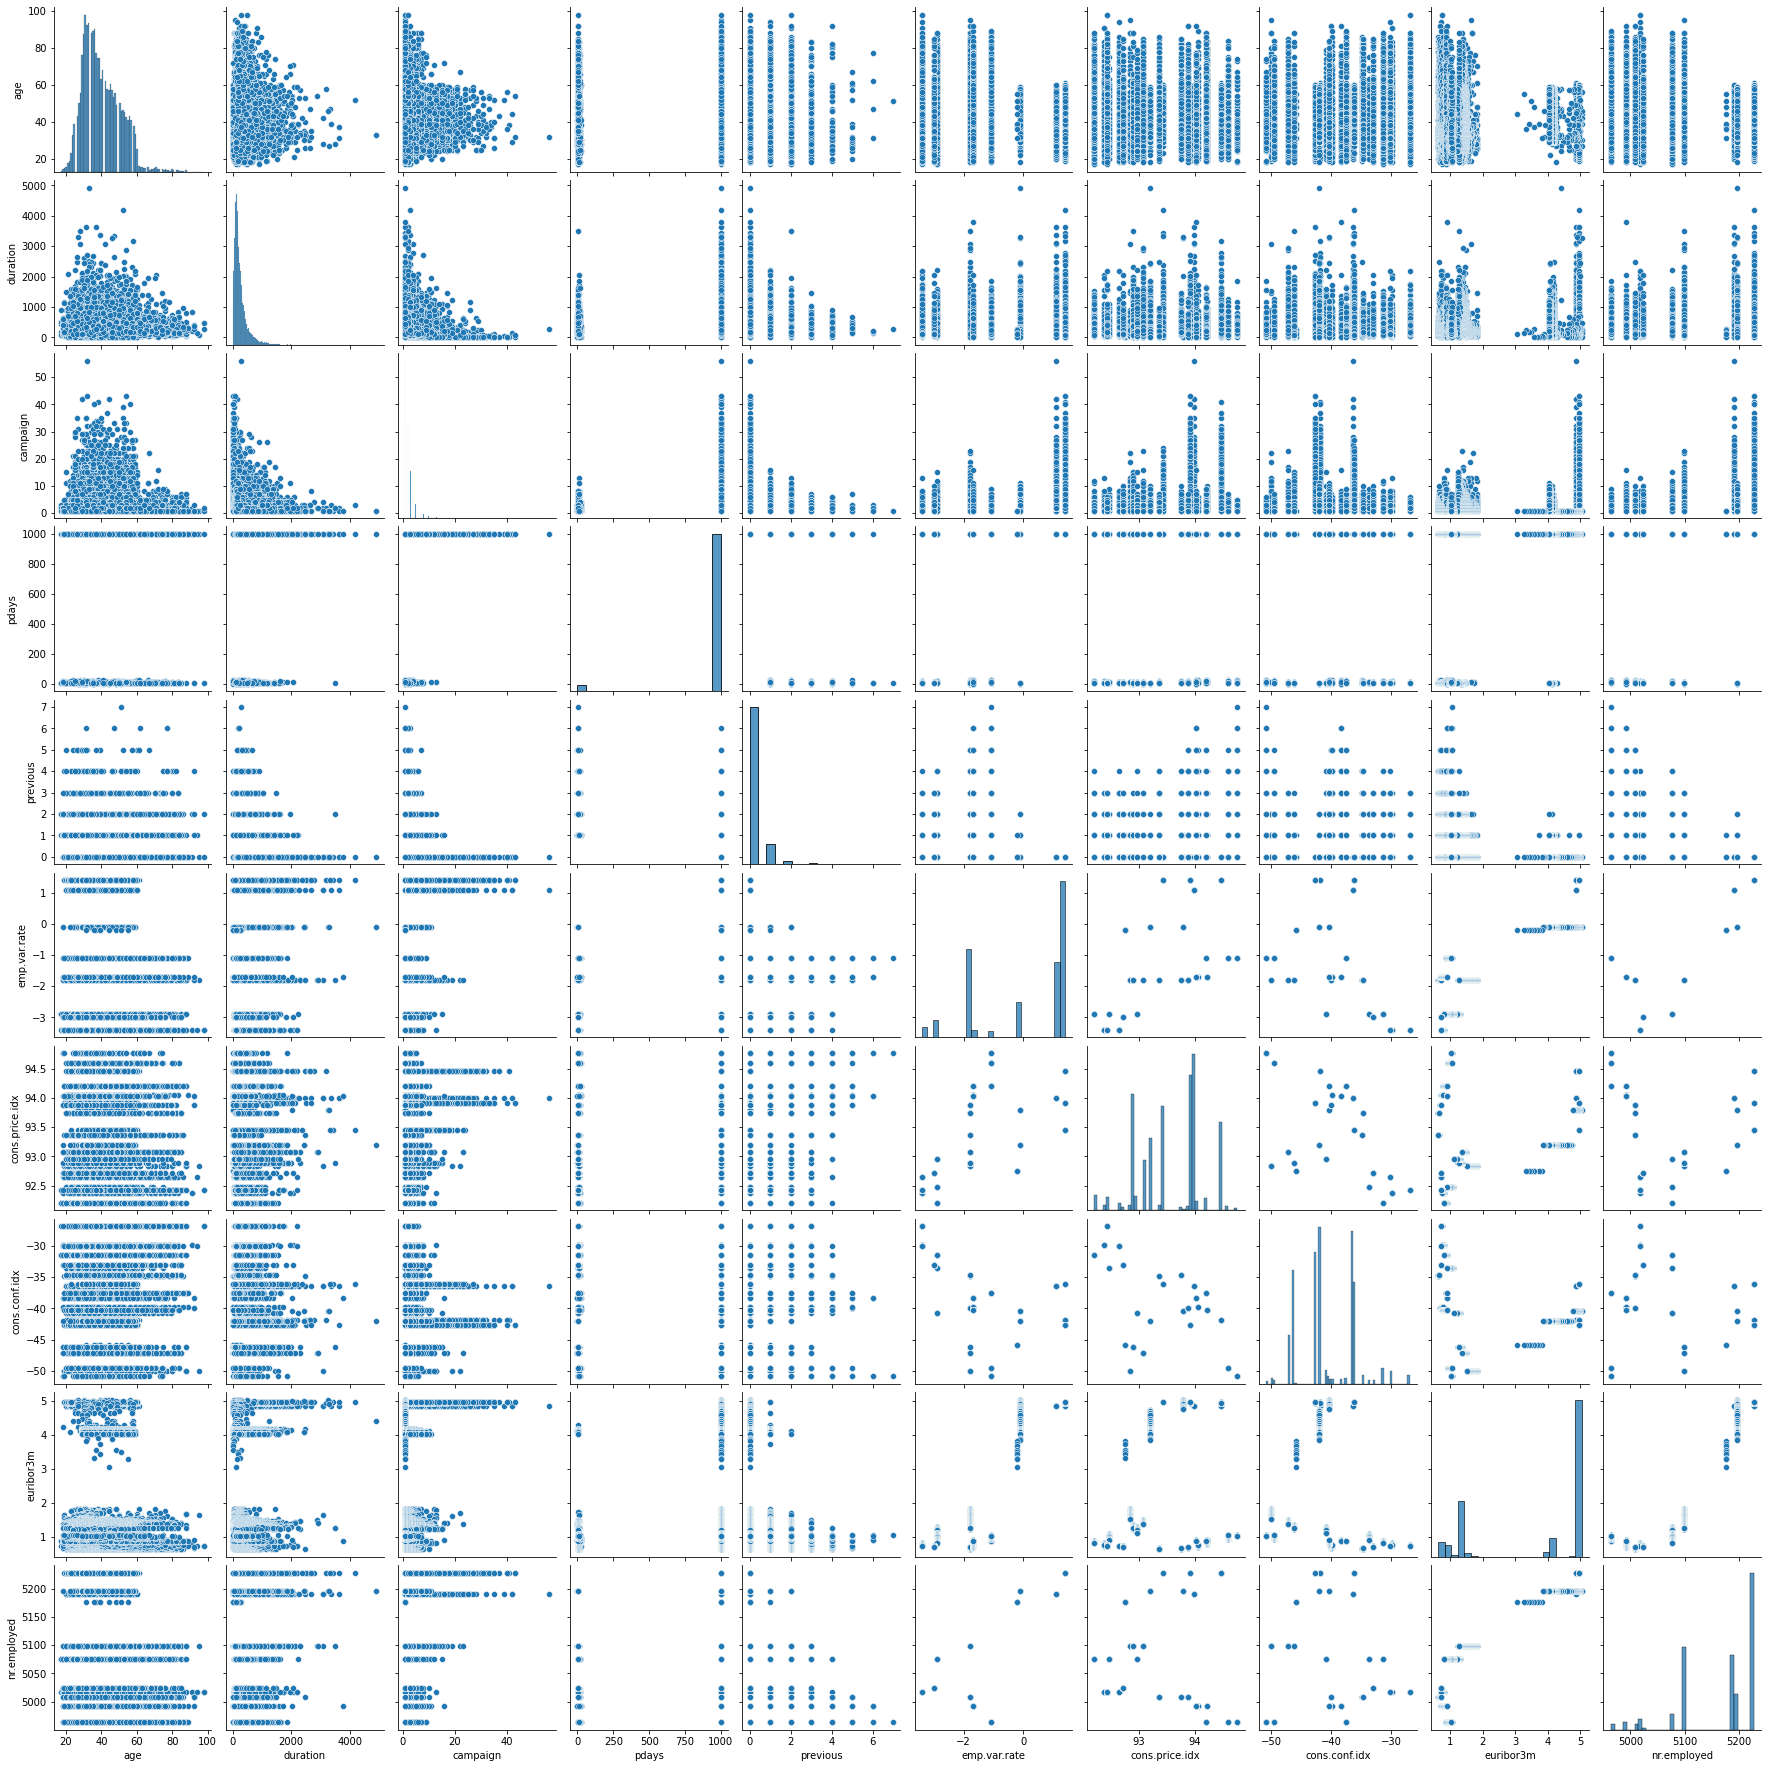

In [10]:
sns.pairplot(data)

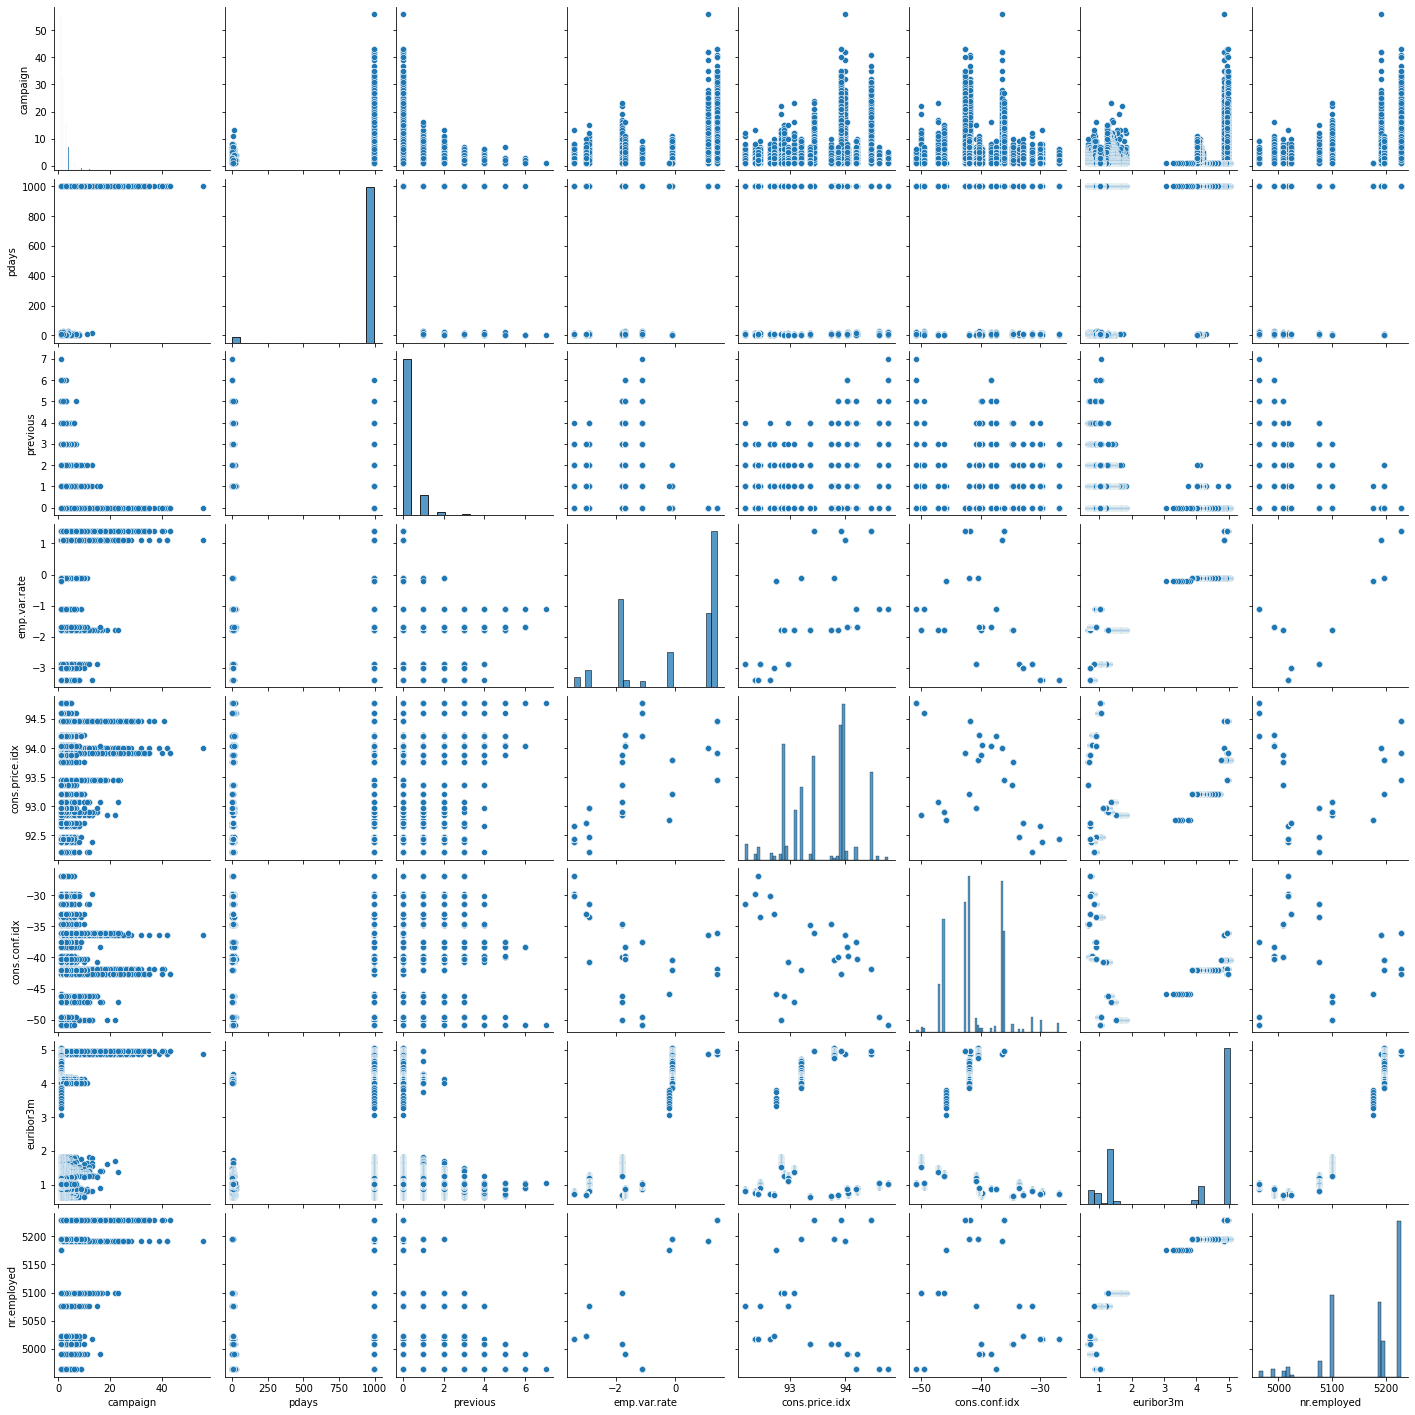

In [11]:
data_cleaned = data.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'duration'],axis = 1)
sns.pairplot(data_cleaned)

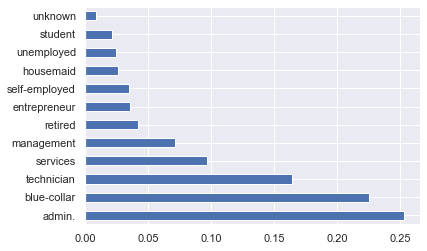

In [16]:
data.job.value_counts(normalize=True)
data.job.value_counts(normalize=True).plot.barh()
plt.show()

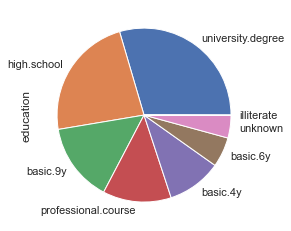

In [17]:
data.education.value_counts(normalize=True)
data.education.value_counts(normalize=True).plot.pie()
plt.show()

# Bivariate Analysis

If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.
a) Numeric-Numeric Analysis:
Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.

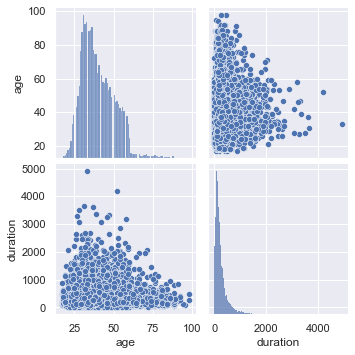

In [20]:
data_cleaned = data.drop(['campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed'],axis = 1)
sns.pairplot(data_cleaned)



Making the client specific pair plots for different non categorical data

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

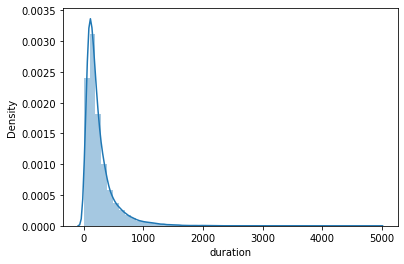

In [13]:
# histogram of duration plot
sns.distplot(data['duration'])

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

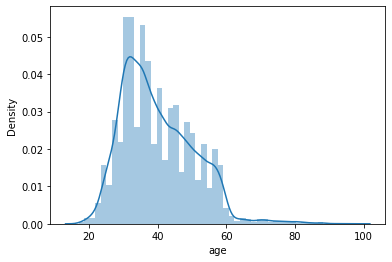

In [14]:
sns.distplot(data['age'])

## histogram show that people of middle age are ore likel to buy subscription

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

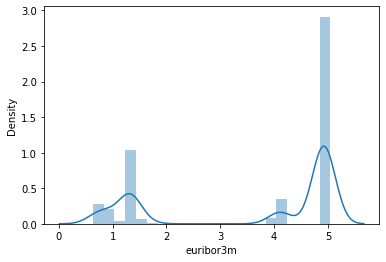

In [15]:
sns.distplot(data['euribor3m'])
data.columns

## Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
Let’s see how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.
First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

marital              divorced   married    single   unknown
education                                                  
basic.4y            -0.124744  0.289250  0.067991 -0.300000
basic.6y             0.187363  0.256763  0.115430  0.516667
basic.9y             0.294513  0.215231 -0.066261 -1.387500
high.school          0.106035  0.172625 -0.222889 -0.100000
illiterate          -2.900000  0.346667 -1.800000       NaN
professional.course  0.357230  0.219328 -0.018329  1.050000
university.degree    0.175991  0.066797 -0.222946 -0.706452
unknown              0.139572  0.266224 -0.443867  1.011111


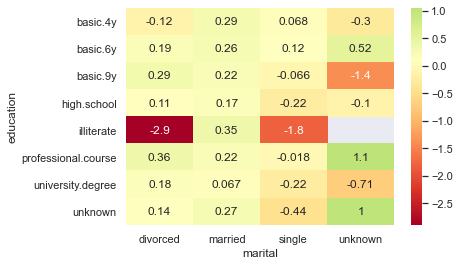

In [27]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='emp.var.rate')
print(result)
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Categorical — Categorical Analysis
Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “emp.var.rate”.

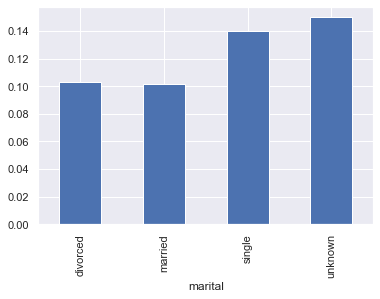

In [26]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.y=='yes',1,0)
data.response_rate.value_counts()
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

# Missing Imputation

In [16]:
# checking if there's ny null value in the dataset
print(data.isnull().sum())
# Droping null value from the dataset
data = data.dropna()
data.isnull().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# One Hot Encoding

In [7]:
data_one_ht =pd.get_dummies(data,drop_first = True)

In [10]:
x = data_one_ht.loc[:,"duration"].to_numpy(); y = data_one_ht.loc[:,"y_yes"].to_numpy();
x_train, x_test, y_train, y_test = train_test_split(x.reshape(len(x),1), y.reshape(len(y),1), random_state=1)

# Logisitc Regression

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [49]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [54]:
y_pred = log_reg.predict(x_test)

In [56]:
confusion_matrix(y_test, y_pred)

array([[7166,  101],
       [ 792,  134]], dtype=int64)

From the confusion matrix it is clear that the number of the true positives are 7166 which is much greater than false positive so we can conclude that our model perform well on the test data 

# Random Forest Classification

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
X_train, X_test, y_train, y_test = train_test_split(x.reshape(len(x),1),y.reshape(len(y),1),test_size=0.2)

In [61]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

<ipython-input-61-a9b66d4a91ca>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [62]:
model.score(X_test, y_test)

0.8784134248665141

In [64]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[5628,  156],
       [ 641,  130]], dtype=int64)

Text(69.0, 0.5, 'Truth')

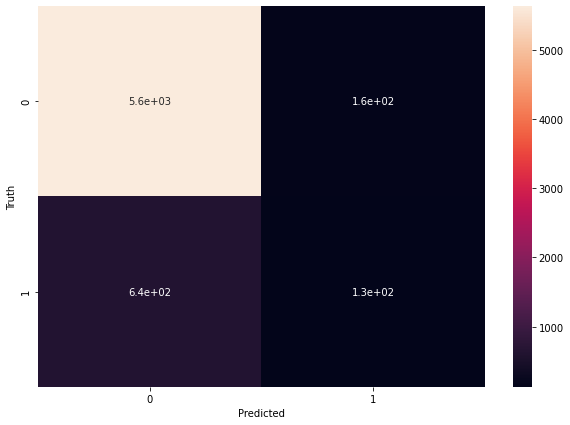

In [65]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x.reshape(len(x),1),y.reshape(len(y),1), test_size=0.3)
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
#Model Accuracy check
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.843287434382284

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             x.reshape(len(x),1),y.reshape(len(y),1), test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]


In [13]:
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8885651857246905


# Analysis & comparison :
- K nearest neighbour algorithm performed best because its score is highest among the other classification techniques
- KNN and random forest classification performed better because data was not perfect fit and was depending on more than one variables, As data was dependent on multiple factor so it was better to choose a multi branch complex algorithm instead of simpler classification techniques. So, random forest and KNN outperformed other algorithm in term of accuracy

# Use Cases 

Following are the prominent observations :
- The customer to which call lasted for longer duration will more likely get the subsciption
- Middle age group people are more likely to get convinced to buy memebership
- Employed people are more likely to buy membership

In the light of the obove observation, company should target collect the data of the office employees of the multinational compaines becuase they are middle age have employment to monetarily support themselves and according to stastistics they are most likely to buy the subscription.

#### Provided data was more than enough for the job